In [15]:
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.io import loadmat
from matplotlib import pyplot as plt
from pprint import pprint

import os

rootdir = (
    ".." if os.getcwd().endswith("tests") or os.getcwd().endswith("sandbox") else "."
)

from oct2py import octave

octave.addpath(os.path.join(rootdir, "sandbox", "matlab", "LeTalker1.22"))
octave.eval("pkg load signal")
octave.eval("warning ('off', 'Octave:data-file-in-path')")

In [16]:
print(os.getcwd())
print(rootdir)
print(
    os.path.exists(
        os.path.join(rootdir, "src", "letalker", "data", "bs_origvowels.mat")
    )
)
vt_data = loadmat(
    os.path.join(rootdir, "src", "letalker", "data", "bs_origvowels.mat")
) | loadmat(os.path.join(rootdir, "src", "letalker", "data", "LeTalkerTrachea.mat"))
pprint(vt_data.keys())

/home/kesh/pyLeTalker/sandbox
..
True
dict_keys(['__header__', '__version__', '__globals__', 'aa', 'ii', 'uu', 'ae', 'ih', 'eh', 'ah', 'aw', 'uh', 'oo', 'uumod', 'areas', 'vow_order', 'note', 'trach'])


In [17]:
N = 1000
p, r, fs = octave.rundemo_LeTalker(N, vt_data["aa"], vt_data["trach"], nout=3)

In [18]:
octave.restart()
octave.addpath(os.path.join(rootdir, "LeTalker1.22"))
octave.eval("warning ('off', 'Octave:data-file-in-path')")
octave.eval("format compact short")

# N = 23
p1, r1, fs1 = octave.rundemo_LeTalker1(N, vt_data["aa"], vt_data["trach"], nout=3)

# print(r['ps'][0,10:20])
# print(r1['ps'][10:20,0])


    _pyeval at line 57 column 30









Oct2PyError: Value "rundemo_LeTalker1" does not exist in Octave workspace

(300.0, 400.0)

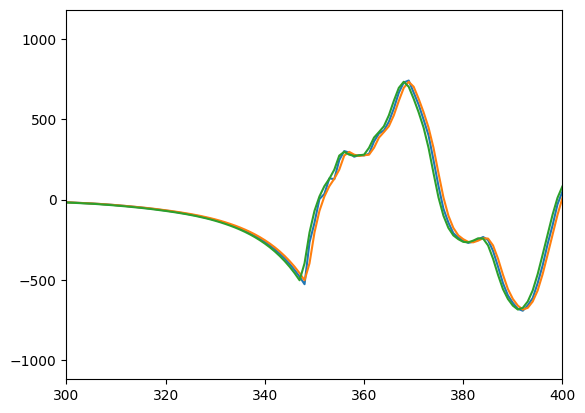

In [ ]:
plt.plot(r["po"].T)
plt.plot(r1["po"])
plt.plot(r1["po"][1:])
plt.xlim(300, 400)

In [ ]:
# Plot some of the waveforms generated by the simulation
# B. Story
# 10.25.11

N2 = N // 2

# set(gca,'PlotBoxAspectRatio',[1 1 1])
# t = [0:1/Fs:(len(r.ug)-1)/Fs]*1000
t = np.arange(N) / fs * 1e3

ValueError: x and y must have same first dimension, but have shapes (200,) and (1, 200)

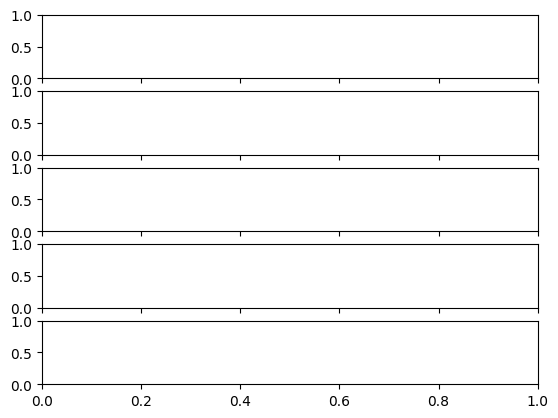

In [ ]:
# -------Plot output pressure (audio)-----------
plt.subplots(5, 1, sharex=True)
plt.subplot(5, 1, 1)
plt.plot(t, r["po"], "-k", lw=1)
# plt.axhline(0,ls='-',c='k')

# # if np.max(r['po']) > 0 and np.min(r['po']) < 0:
# #     plt.axis([t[0], t[-1], 1.1*np.min(r['po']), 1.1*np.max(r['po'])])
# # else:
# #     plt.axis([t[0], t[-1], -.1, .1])
# plt.yticks([0])
# # set(gca,'Box','off','YTick',[0],fontsize=12,fontweight='bold')
# v = plt.axis()
# plt.annotate('$P_o$',(1,0.5),(-2,0),'axes fraction','offset points',fontsize=12,fontweight='bold')

# if 'fo' in r:
#     plt.title(f'F0 = {r["fo"]} Hz')


# -------Plot subglottal and intraglottal pressure -----------
# plt.subplot(5,1,2)

# [b,a] = butter(2,30/(44100/2))

# plt.plot(t,r['ps'],'-k',lw=1)
# plt.plot(t,filtfilt(b,a,r['ps']),'-r')
# #p_intrag = ((r.f1*p.T*p.L)+(r.f2*p.T*p.L))/2
# p_intrag = (r['f1']+r['f2'])/2 * 2* p['T']*p['L']
# plt.plot(t,p_intrag,'-b')
# # plt.axis([t[0], t[-1], np.min(p_intrag)-1000, np.max(r['ps'])+1000])
# plt.axhline(0,ls='-',c='k')
# # set(gca,'Box','off','YTick',[0],fontsize=12,fontweight='bold')
# v = plt.axis()
# plt.text(-.0025*N,(v[2]+v[3])/2,'Ps and Pg',fontsize=12,fontweight='bold')
# h = plt.legend(('Ps','Ps (smoothed)','Pg'))


# # -------Plot glottal flow -----------
# plt.subplot(5,1,3)
# plt.plot(t,r.ug,'-k',lw=1)
# # plt.axis([t[0], t[-1], 0 ,1.1*np.max(r['ug'])])
# plt.axhline(0,ls='-',c='k')
# # set(gca,'Box','off','YTick',[0],fontsize=12,fontweight='bold')
# v = plt.axis()
# plt.text(-.0025*N,(v[2]+v[3])/2,'Ug',fontsize=12,fontweight='bold')
# plt.title(f'Max Glottal Flow = {round(np.max(r["ug"]))} cm³/s')

# # -------Plot glottal area -----------
# plt.subplot(5,1,4)
# plt.plot(t,r.ga,'-k',lw=1)
# # plt.axis([t[0], t[-1], 0, 1.1*np.max(r.ga)])
# plt.axhline(0,ls='-',c='k')
# # set(gca,'Box','off','YTick',[0],fontsize=12,fontweight='bold')
# v = plt.axis()
# plt.text(-.0025*N,(v[2]+v[3])/2,'Ag',fontsize=12,fontweight='bold')

# plt.title(f'Max Glottal Area = {round(100*np.max(r["ga"]))/100} cm²')

# #
# # -------Plot displacement of lower (x1), upper (x2), and body (xb) masses -----------
# plt.subplot(5,1,5)
# plt.plot(t,r.x1,'-b',lw=1)
# plt.plot(t,r.x2,'-r',lw=1)
# plt.plot(t,r.xb+0.2,'-k',lw=1)
# # plt.axis([t[0], t[-1], -0.1, 1.1*np.max(r['xb'])+0.2])
# plt.axhline(0,ls='-',c='k')
# # set(gca,'Box','off','YTick',[0],fontsize=12,fontweight='bold')
# v = plt.axis()
# plt.text(-.0025*N,(v[2]+v[3])/2,'Disp.',fontsize=12,fontweight='bold')

# plt.xlabel('Time (ms)')
# #

In [ ]:
# -===============================
# Open a new figure and plot the trachea and vocal tract area functions

plt.figure()

dx = 0.396825
x_vt = dx * np.arange(44)
x_tr = dx * np.arange(0, -32, -1)

plt.plot(x_vt, p["ar"][0, :44] if p["SUPRA"] else np.zeros_like(x_vt), "-b", lw=2)
plt.plot(x_tr, p["ar"][0, 44:] if p["SUB"] else np.zeros_like(x_tr), "-r", lw=2)
plt.plot([0, 0], [0, 10], "-k")

# set(gca,'PlotBoxAspectRatio',[1 .6 1])
# set(gca,'XTick',[-12:2:18])
# set(gca,fontsize=14,fontweight='bold')
plt.xlabel("Distance from glottis (cm)")
plt.ylabel("Area (cm²)")
# plt.axis([-14, 18, 0, 8])
plt.text(-10, 7, "Trachea", fontsize=14)
plt.text(8, 7, "Vocal tract", fontsize=14)
plt.grid()

plt.show()